In [1]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

team_id = 16
df = pd.read_csv("scaled_teams.csv")
points_df = pd.read_csv("scaled_points.csv")
scaled_games_df = pd.read_csv("scaled_games.csv")
games_df = pd.read_csv("games_processed.csv")

In [2]:

team = df.loc[df['id'] == team_id]
team = team[['year', 'abbrev', 'location', 'nickname', 'rankCalculatedFinal', 'record.overall.wins', 'record.overall.losses', 'record.overall.pointsFor', 'record.overall.pointsAgainst', 'scaled_pointsFor', 'scaled_pointsAgainst', 'residuals', 'pred_wins' ]]
team.rename(columns={'record.overall.wins': 'wins', 'record.overall.losses': 'losses', 'record.overall.pointsFor': 'pointsFor', 'record.overall.pointsAgainst': 'pointsAgainst', 'rankCalculatedFinal': 'finalRank'}, inplace=True)
#team.set_index("year", inplace=True)
team.sort_values('year', inplace=True)
team.head(10)

,year,abbrev,location,nickname,finalRank,wins,losses,pointsFor,pointsAgainst,scaled_pointsFor,scaled_pointsAgainst,residuals,pred_wins
26,2012,JJJ,Playoffs,here I come,12,5,8,1291.0,1443.0,-0.373978,1.130822,0.113171,4.886829
36,2013,JJJ,Triple,J,2,9,4,1754.6,1403.5,2.029172,-0.987655,-1.223770,10.223770
48,2014,JJJ,Randy,Bobandy,12,4,9,1372.4,1525.8,-1.067504,0.445354,-0.694366,4.694366
59,2015,JJJ,Randy,Bobandy,4,6,7,1510.8,1559.7,0.649878,0.833642,-0.531473,6.531473
70,2016,JJJ,Randy,Bobandy,10,3,10,1285.8,1607.0,-1.099669,1.865552,-0.176476,3.176476
82,2017,JJJ,The,Mooch,9,4,9,1164.0,1435.1,-1.320221,1.174532,0.393138,3.606862
94,2018,JJJ,Milk,Steak,10,4,9,1831.4,1861.8,0.124385,0.387546,-2.309476,6.309476
106,2019,JJJ,Boofing,Kavanaugh,6,7,6,1691.8,1848.4,-0.603919,1.040677,2.319488,4.680512
117,2020,JJJ,COVID,19,10,5,8,1614.0,1712.4,-0.446366,0.069552,-0.895299,5.895299
9,2021,JJJ,Tua,Hearts,10,3,11,1768.0,2047.2,-0.476772,2.063998,-0.782924,3.782924


In [3]:
team[["wins", "losses"]].mean()

wins      5.0
losses    8.1
dtype: float64

<AxesSubplot:xlabel='year'>

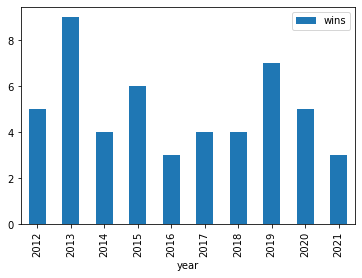

In [4]:
team[["wins", 'year']].plot(kind="bar", x='year')

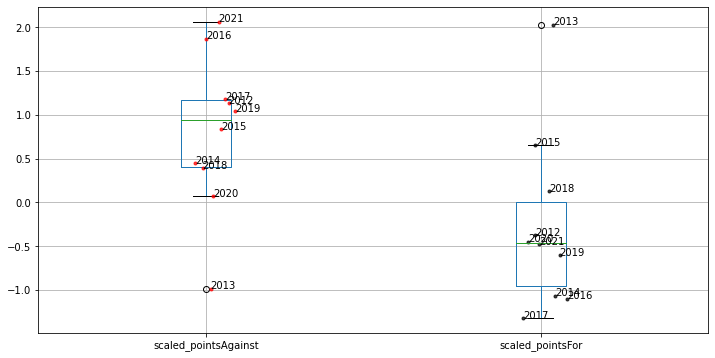

In [5]:
ax = team.boxplot(column=["scaled_pointsAgainst", "scaled_pointsFor"], figsize=(12,6))
for index, t in team.iterrows():
    y = t["scaled_pointsFor"]
    x = np.random.normal(2, 0.04)
    ax.plot(x, y, 'k.', alpha=0.75)
    ax.text(x, y, t['year'])
    y_for = t["scaled_pointsAgainst"]
    x_for = np.random.normal(1, 0.04)
    ax.plot(x_for, y_for, 'r.', alpha=0.75)
    ax.text(x_for, y_for, t['year'])

In [6]:
team_points = points_df.loc[points_df["team_id"] == team_id]
team_points.head(10)

,year,team_id,diff,scaled_diff
9,2018,16,-845.6,-0.622084
21,2019,16,-208.5,1.493497
33,2020,16,-733.2,-0.975139
46,2021,16,-233.1,-0.092030


In [7]:
scaled_games = scaled_games_df.loc[scaled_games_df['Team'] == team_id]
scaled_games.head(10)

,year,Team,lucky_win,unlucky_loss,scaled_lucky_win,scaled_unlucky_loss
15,2012,16,1,2,-0.632082,0.229416
25,2013,16,1,2,-0.577350,0.562254
37,2014,16,0,1,-2.110579,-0.389490
49,2015,16,1,1,-0.315597,-0.485071
61,2016,16,1,2,-0.688247,0.208514
73,2017,16,5,1,2.335419,-0.772049
85,2018,16,2,2,-0.066372,-0.063119
97,2019,16,0,2,-0.933257,0.392232
109,2020,16,1,2,-0.593391,0.000000
121,2021,16,3,2,0.251577,0.353553


In [8]:
games = games_df.loc[games_df['Team'] == team_id]
games.sort_values("year", inplace=True)
games.head()

/home/jjohanan/projects/ESPN-Fantasy-Football-Analysis/env/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Unnamed: 0,Unnamed: 0.1,Week,Team,Margin,Score,OppScore,year,week_mean,abbrev,id,win,for_diff,against_diff,unlucky_loss,lucky_win
234,234,220,15,16,64.0,119.0,55.0,2012,102.5625,JJJ,16,True,16.4375,-47.5625,0,0
235,235,227,16,16,-45.0,98.0,143.0,2012,108.6875,JJJ,16,False,-10.6875,34.3125,0,0
233,233,211,14,16,-31.0,104.0,135.0,2012,104.4375,JJJ,16,False,-0.4375,30.5625,0,0
232,232,199,13,16,-13.0,80.0,93.0,2012,105.8750,JJJ,16,False,-25.8750,-12.8750,0,0
231,231,192,12,16,21.0,114.0,93.0,2012,109.1250,JJJ,16,True,4.8750,-16.1250,0,0


IndexError: index 3 is out of bounds for axis 0 with size 3

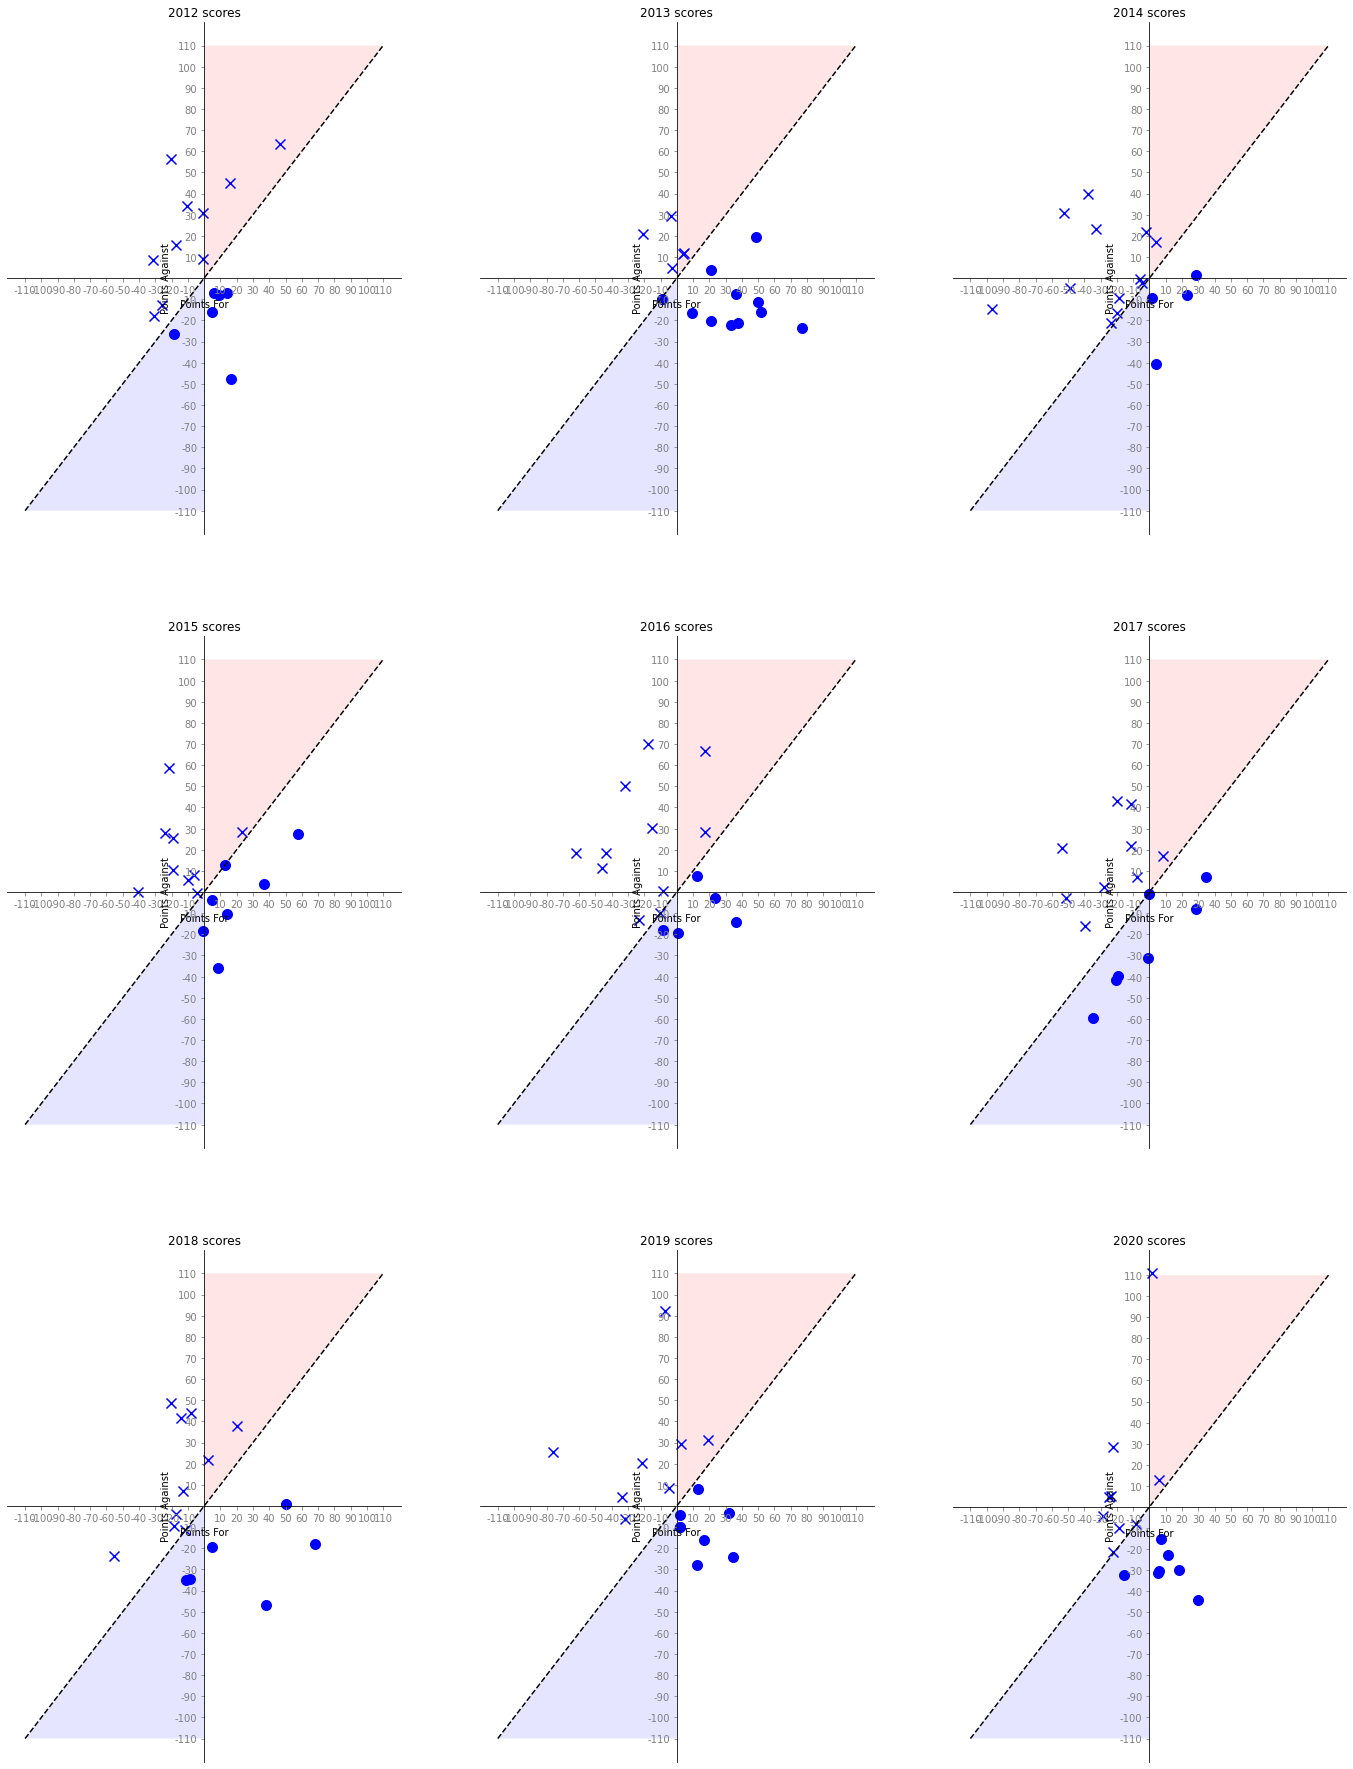

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,32))

z = 110

def build_plot(ax, data):
    ax.fill_between([-z,0], -z, [-z,0], facecolor='b', alpha=0.1)
    ax.fill_between([0,z], [0,z], z, facecolor='r', alpha=0.1)

    ax.scatter(data=data.query('win'), x='for_diff', y='against_diff', 
            c='b', 
            s=100,
            marker='o',
            label='Win')
    ax.scatter(data=data.query('not win'), x='for_diff', y='against_diff', 
            c='b', 
            s=100,
            marker='x',
            label='Loss')
    ax.plot([-z,z],[-z,z], 'k--')

    ax.set_xlabel('Points For')
    ax.set_ylabel('Points Against')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()

    tx = list(range(-z,z+1,10))
    tx.remove(0)
    ax.yaxis.set(ticks=tx, ticklabels=tx)
    ax.xaxis.set(ticks=tx, ticklabels=tx)

    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')
    
    ax.set(title='{} scores'.format(data["year"].iloc[0]))

for idx, x in enumerate(games["year"].unique()):
    row = math.trunc(idx/3)
    col = idx - (row * 3)
    build_plot(ax[row][col], games.loc[games["year"] == x])